FileNotFoundError: [Errno 2] No such file or directory: 'years\\yob1900.txt'

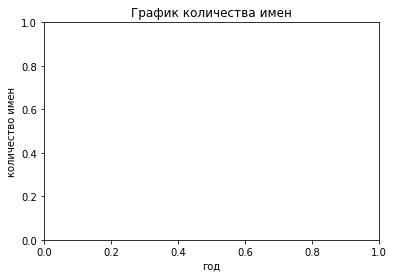

In [3]:
# задание 1
import matplotlib.pyplot as plt


def find_Xcoordinate(year, file_link):
    coordinates = [0, 0]
    years_link = file_link + 'yob' + str(year) + '.txt'
    with open(years_link, encoding="UTF-8") as f:
        for people in f:
            people = people.strip().split(',')
            if people[0] == 'Ruth':
                coordinates[0] = people[2]
            elif people[0] == 'Robert':
                coordinates[1] = people[2]
    return coordinates

if __name__ == '__main__':
    plt.xlabel('год')
    plt.ylabel('количество имен')
    plt.title('График количества имен')

    years_link = 'years\\'
    for year in range(1900, 2000, 1):
        x = find_Xcoordinate(year, years_link)
        y = find_Xcoordinate(year + 1, years_link)
        plt.plot((year, year + 1), (x[0], y[0]), color='#0d98ba')
        plt.plot((year, year + 1), (x[1], y[1]), color='#c27c51')
    
    plt.show()


In [1]:
# задание 2
import matplotlib.pyplot as plt

bar_coordinate = {'x':[],
                  'y':[]}
for year in range(1900, 2001, 5):
    file_link = 'years\\'
    file_link = file_link + 'yob' + str(year) + '.txt'
    name_quantity = 0
    with open(file_link, encoding='UTF-8') as f:
        for name in f:
            name = name.strip().split(',')
            if (name[0] == 'Ruth') or (name[0] == 'Robert'):
                name_quantity += int(name[2])
    bar_coordinate['y'].append(name_quantity)
    bar_coordinate['x'].append(year)

plt.bar(bar_coordinate['x'], bar_coordinate['y'])
plt.show()

FileNotFoundError: [Errno 2] No such file or directory: 'years\\yob1900.txt'

In [1]:
# задание 3
import matplotlib.pyplot as plt


file_link = 'years\\yob1950.txt'

names_list = []
with open(file_link, encoding='UTF-8') as f:
    for name in f:
        name = name.strip().split(',')
        if name[0][0] == 'R':
            names_list.append(int(name[2]))

names_list = sorted(names_list)
plt.pie(names_list[-10:])
plt.show()

FileNotFoundError: [Errno 2] No such file or directory: 'years\\yob1950.txt'

In [1]:
# номер 4
import matplotlib.pyplot as plt


plt.ylabel('Количество упоминаний')
plt.xlabel('Количество согласных')
consonants = 'bcdfghjklmnpqrstvwxyz'
for year in range(1900, 2001, 1):
    coordinates = {'x':[], 'y':[]}
    file_link = 'years\\'
    file_link = file_link + 'yob' + str(year) + '.txt'
    with open(file_link, encoding='UTF-8') as f:
        for people in f:
            people = people.strip().split(',')
            consonants_quantity = 0
            for name in people[0]:
                if name in consonants:
                    consonants_quantity += 1
            coordinates['x'].append(consonants_quantity)
            coordinates['y'].append(int(people[2]))
    print(year, 'год обработан')
    plt.scatter(coordinates['x'], coordinates['y'])
plt.show()

FileNotFoundError: [Errno 2] No such file or directory: 'years\\yob1900.txt'